In [50]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import joblib

In [52]:
data = Path("train.csv")
df = pd.read_csv(data)
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [56]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [79]:
newdf = df.copy()

In [80]:
# drop non int features

# version 1.0 remove non int features (0.7851620252550958)
newdf.drop(['id', 'CustomerId','Surname'], axis = 1, inplace = True)

# version 1.1 remove more columns (acuuracy = 0.788409801497855)
# newdf.drop(['id', 'CustomerId','Surname','HasCrCard','Balance'], axis = 1, inplace = True)

In [81]:
# check newdf
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [82]:
# Create new columns based on the Gender column
newdf['Is_Male'] = newdf['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
newdf['Is_Female'] = newdf['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

# Create new columns based on the Geography column
newdf['Is_Germany'] = newdf['Geography'].apply(lambda x: 1 if x == 'Germany' else 0)
newdf['Is_Spain'] = newdf['Geography'].apply(lambda x: 1 if x == 'Spain' else 0)
newdf['Is_France'] = newdf['Geography'].apply(lambda x: 1 if x == 'France' else 0)

In [83]:
# drop non int features
newdf.drop(['Geography','Gender'], axis = 1, inplace = True)

In [84]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Age              165034 non-null  float64
 2   Tenure           165034 non-null  int64  
 3   Balance          165034 non-null  float64
 4   NumOfProducts    165034 non-null  int64  
 5   HasCrCard        165034 non-null  float64
 6   IsActiveMember   165034 non-null  float64
 7   EstimatedSalary  165034 non-null  float64
 8   Exited           165034 non-null  int64  
 9   Is_Male          165034 non-null  int64  
 10  Is_Female        165034 non-null  int64  
 11  Is_Germany       165034 non-null  int64  
 12  Is_Spain         165034 non-null  int64  
 13  Is_France        165034 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 17.6 MB


 ## Separate the Features (X) from the Target (y)

In [85]:
y = newdf["Exited"]
X = newdf.drop(columns="Exited")

 ## Split our data into training and testing

In [86]:


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(123775, 13)

 ## Create a Logistic Regression Model

In [87]:

classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

 ## Fit (train) or model using the training data

In [88]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

 ## Score the model using the test data

In [89]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7857725711977378
Testing Data Score: 0.7851620252550958


 ## Make predictions

In [90]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,1
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,0,0
7,0,0
8,0,1
9,0,0


## Calculate the Accuracy Score

In [91]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.7851620252550958

In [92]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [93]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,31337,1192
Actual 1,7672,1058


Accuracy Score : 0.7851620252550958
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.96      0.88     32529
           1       0.47      0.12      0.19      8730

    accuracy                           0.79     41259
   macro avg       0.64      0.54      0.53     41259
weighted avg       0.73      0.79      0.73     41259



In [94]:
# calculate feature importance

coefficients = classifier.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})

feature_importance.head(30)



,Feature,Importance
0,CreditScore,0.006222
1,Age,0.067813
2,Tenure,0.001939
3,Balance,0.000004
4,NumOfProducts,0.002576
5,HasCrCard,0.000302
6,IsActiveMember,0.002654
7,EstimatedSalary,0.000001
8,Is_Male,0.001882
9,Is_Female,0.001722


<Axes: title={'center': 'Features Importances'}, ylabel='Feature'>

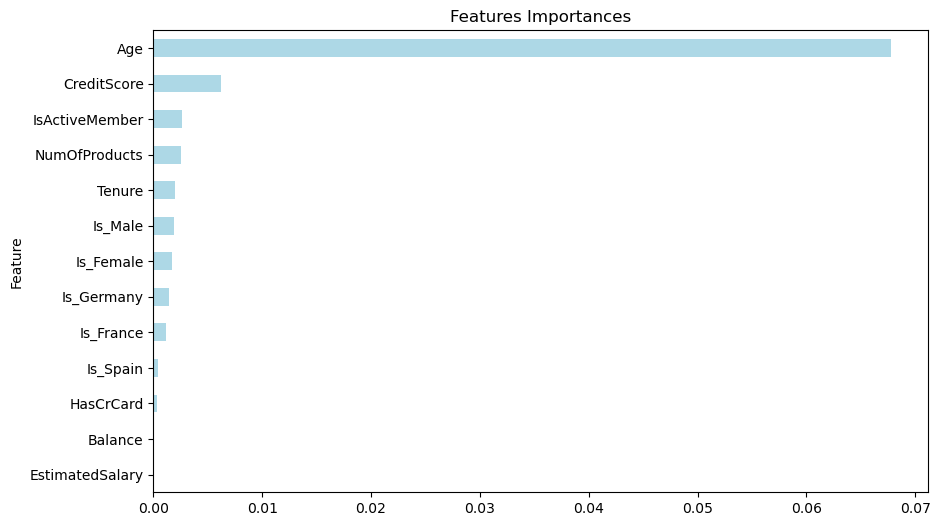

In [96]:
# plot feature importance

feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='lightblue', title= 'Features Importances', legend=False, figsize=(10, 6))

In [27]:
results.to_csv('regression_predictions.csv',index=True)

In [28]:
# save the model to disk
filename = 'regression_model'
joblib.dump(classifier, filename)

['regression_model']